## Pre-Processing

In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import cv2

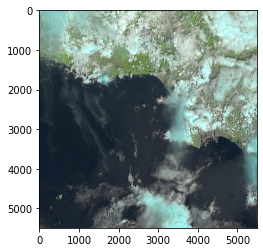

In [2]:
image = plt.imread("./Satellite Image Dataset/20190429T183604.tif",cv2.IMREAD_UNCHANGED)
plt.imshow(image)

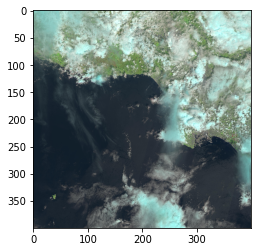

In [3]:
imageS = cv2.resize(image,(400,400))
plt.imshow(imageS)

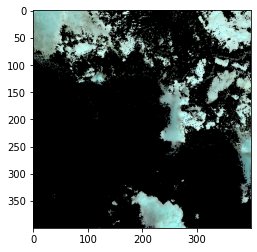

In [4]:
import cv2
import numpy as np
img_hsv = cv2.cvtColor(imageS, cv2.COLOR_BGR2HSV)
hsv_color2 = np.asarray([60, 255, 255], np.uint8) 
hsv_color1 = np.asarray([30, 30, 30], np.uint8)   

mask = cv2.inRange(img_hsv, hsv_color1, hsv_color2)

res = cv2.bitwise_and(imageS,imageS, mask = mask)

plt.imshow(res)   # this colormap will display in black / white
plt.show()

In [5]:
import cv2
from skimage import data, img_as_float
h, z, img_gray = cv2.split(res)


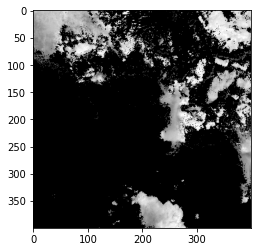

In [6]:
plt.imshow(img_gray, cmap="gray")

In [7]:
img_gray[img_gray > 0] = 1


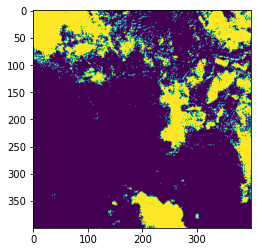

In [8]:
plt.imshow(img_gray)

In [9]:
import os
from sklearn import preprocessing
all_samples = np.empty(shape=(230,40,40,1))
count = 1;
for x in sorted(os.listdir("./Satellite Image Dataset/")):
        photo = cv2.imread("./Satellite Image Dataset/" + x)
        photo = cv2.resize(photo,(40,40))
        photo_hsv = cv2.cvtColor(photo, cv2.COLOR_BGR2HSV)
        p_hsv_color2 = np.asarray([60, 255, 255], np.uint8) 
        p_hsv_color1 = np.asarray([30, 30, 30], np.uint8)   
        photo_mask = cv2.inRange(photo_hsv, p_hsv_color1, p_hsv_color2)
        photo_res = cv2.bitwise_and(photo,photo, mask = photo_mask)
        p_h, p_z, p_img_gray = cv2.split(photo_res)
        p_img_gray[p_img_gray > 0] = 1
        p_img_gray = np.reshape(p_img_gray,(40,40,1))
        all_samples[count] = p_img_gray
        print(count, "images added")
        count = count + 1

1 images added
2 images added
3 images added
4 images added
5 images added
6 images added
7 images added
8 images added
9 images added
10 images added
11 images added
12 images added
13 images added
14 images added
15 images added
16 images added
17 images added
18 images added
19 images added
20 images added
21 images added
22 images added
23 images added
24 images added
25 images added
26 images added
27 images added
28 images added
29 images added
30 images added
31 images added
32 images added
33 images added
34 images added
35 images added
36 images added
37 images added
38 images added
39 images added
40 images added
41 images added
42 images added
43 images added
44 images added
45 images added
46 images added
47 images added
48 images added
49 images added
50 images added
51 images added
52 images added
53 images added
54 images added
55 images added
56 images added
57 images added
58 images added
59 images added
60 images added
61 images added
62 images added
63 images added
6

In [10]:
all_samples[225] = all_samples[0]
all_samples[226] = all_samples[1]
all_samples[227] = all_samples[2]
all_samples[228] = all_samples[3]
all_samples[229] = all_samples[4]

In [11]:
all_samples.shape 

(230, 40, 40, 1)

In [12]:
count = 0
final = np.empty((225,5,40,40,1))
for i in range(225):
    bundle = np.array([all_samples[i],all_samples[i+1],all_samples[i+2],all_samples[i+3],all_samples[i+4]])
    final[i] = bundle
X_train = final[0:165]
X_test = final[166:221]
print(X_train.shape, "X_train shape")
print(X_test.shape, "X_test shape")

(165, 5, 40, 40, 1) X_train shape
(55, 5, 40, 40, 1) X_test shape


In [13]:
y_train = final[5:170]
y_test = final[171:226]
print(X_train.shape, "X_train shape")
print(X_test.shape, "X_test shape")

(165, 5, 40, 40, 1) X_train shape
(55, 5, 40, 40, 1) X_test shape


In [14]:
all_samples.shape

(230, 40, 40, 1)

In [15]:
from keras.models import Sequential
from keras.layers.convolutional import Conv3D
from keras.layers import ConvLSTM2D
from keras.layers import BatchNormalization

## seq2seq model

In [16]:
seq = Sequential()
seq.add(ConvLSTM2D(filters=1, kernel_size=(2, 2),
                   input_shape=(5, 40, 40, 1),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=1, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(Conv3D(filters=1, kernel_size=(3, 3, 3),
               activation='sigmoid',
               padding='same', data_format='channels_last'))
seq.compile(loss='mean_absolute_error', optimizer='nadam')
seq.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_lstm2d (ConvLSTM2D)    (None, 5, 40, 40, 1)      36        
                                                                 
 batch_normalization (BatchN  (None, 5, 40, 40, 1)     4         
 ormalization)                                                   
                                                                 
 conv_lstm2d_1 (ConvLSTM2D)  (None, 5, 40, 40, 1)      76        
                                                                 
 batch_normalization_1 (Batc  (None, 5, 40, 40, 1)     4         
 hNormalization)                                                 
                                                                 
 conv3d (Conv3D)             (None, 5, 40, 40, 1)      28        
                                                                 
Total params: 148
Trainable params: 144
Non-trainable pa

## training

In [17]:
seq.fit(X_train, y_train, batch_size=10, epochs=50, validation_split=0.1)

Epoch 1/50
15/15 [==============================] - 11s 171ms/step - loss: 0.4782 - val_loss: 0.4929
Epoch 2/50
15/15 [==============================] - 2s 127ms/step - loss: 0.4081 - val_loss: 0.4797
Epoch 3/50
15/15 [==============================] - 2s 141ms/step - loss: 0.3401 - val_loss: 0.4638
Epoch 4/50
15/15 [==============================] - 2s 143ms/step - loss: 0.2994 - val_loss: 0.4502
Epoch 5/50
15/15 [==============================] - 2s 143ms/step - loss: 0.2733 - val_loss: 0.4394
Epoch 6/50
15/15 [==============================] - 2s 138ms/step - loss: 0.2545 - val_loss: 0.4293
Epoch 7/50
15/15 [==============================] - 2s 148ms/step - loss: 0.2408 - val_loss: 0.4188
Epoch 8/50
15/15 [==============================] - 2s 157ms/step - loss: 0.2306 - val_loss: 0.4069
Epoch 9/50
15/15 [==============================] - 2s 143ms/step - loss: 0.2227 - val_loss: 0.3933
Epoch 10/50
15/15 [==============================] - 2s 146ms/step - loss: 0.2163 - val_loss: 0.377

## prediction

In [18]:
Y_hat = seq.predict(X_test, verbose=0)
Y_hat.shape
y_test.shape

(54, 5, 40, 40, 1)

## visualization

In [65]:
from sklearn import preprocessing
def visulization(y, y_hat, n_slots):
    import random
    import matplotlib.pyplot as plt
    import numpy as np
    length = y_hat.shape[0]
    random_ind = [x for x in range(0,n_slots)]
    stations = ['0', '1', '2', '3', '4', '5', '6']
    fea = ['0', '1', '2', '3', '4']
    setCount = 1;
    for ind in random_ind:
        setCount = setCount+1;
        fig, (ax1, ax2)= plt.subplots(1, 2, sharey=True, sharex=True, figsize=(10, 5))
        y_pre = y_hat[ind,0,:,:,0] 
        ax1.imshow(y_pre)
        y_truth = y[ind,0,:,:,0]
        ax2.imshow(y_truth)
        plt.text(2, -0.8, 'NEW SET, Ground truth Frame 1', fontsize=13)
    
        fig, (ax1, ax2)= plt.subplots(1, 2, sharey=True, sharex=True, figsize=(10, 5))
        y_pre = y_hat[ind,1,:,:,0] 
        ax1.imshow(y_pre)
        y_truth = y[ind,1,:,:,0]
        ax2.imshow(y_truth)
        plt.text(2, -0.8, 'Ground truth Frame 2', fontsize=13)
    
    
        fig, (ax1, ax2)= plt.subplots(1, 2, sharey=True, sharex=True, figsize=(10, 5))
        
        y_pre = y_hat[ind,2,:,:,0] 
        ax1.imshow(y_pre)

        y_truth = y[ind,2,:,:,0]
        ax2.imshow(y_truth)
        plt.text(2, -0.8, 'Ground truth Frame 3', fontsize=13)
    
        fig, (ax1, ax2)= plt.subplots(1, 2, sharey=True, sharex=True, figsize=(10, 5))
        y_pre = y_hat[ind,3,:,:,0] 
        ax1.imshow(y_pre)

        y_truth = y[ind,3,:,:,0]
        ax2.imshow(y_truth)

        plt.text(2, -0.8, 'Ground truth Frame 4', fontsize=13)
    
        fig, (ax1, ax2)= plt.subplots(1, 2, sharey=True, sharex=True, figsize=(10, 5))

        y_pre = y_hat[ind,4,:,:,0] 
        ax1.imshow(y_pre)
        y_truth = y[ind,4,:,:,0]
        ax2.imshow(y_truth)
        plt.text(2, -0.8, 'Ground truth Frame 5', fontsize=13)
    

C:\Users\ayush\AppData\Local\Temp\ipykernel_11084\507949495.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax1, ax2)= plt.subplots(1, 2, sharey=True, sharex=True, figsize=(10, 5))


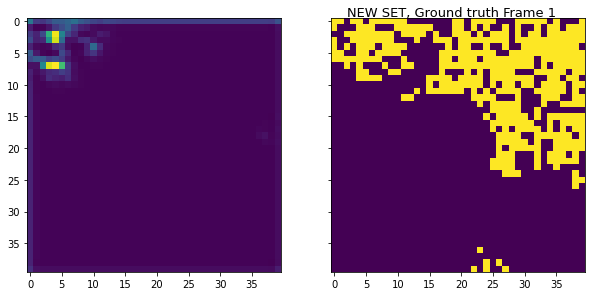

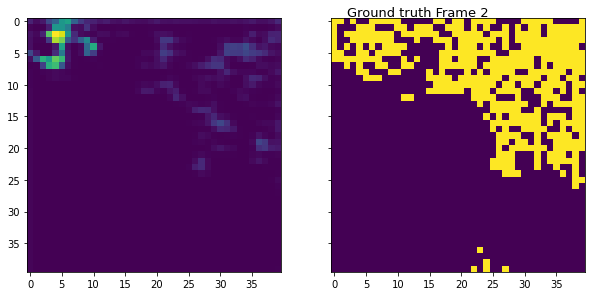

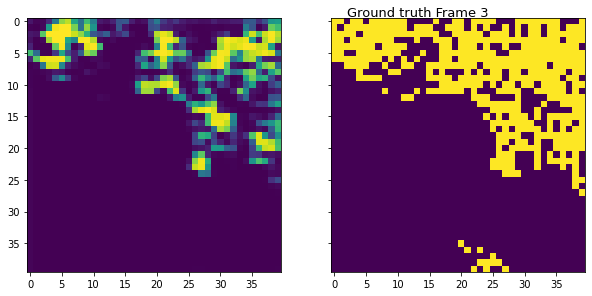

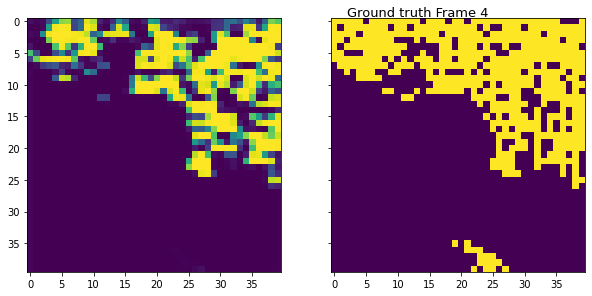

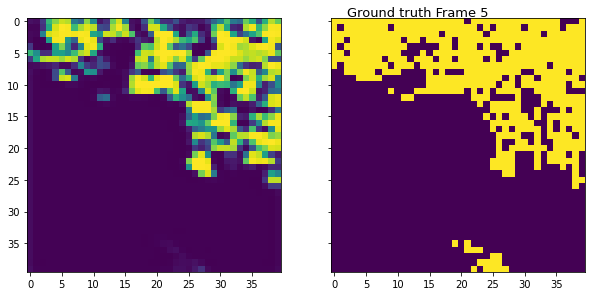

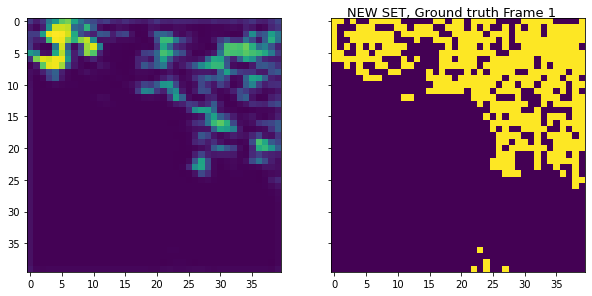

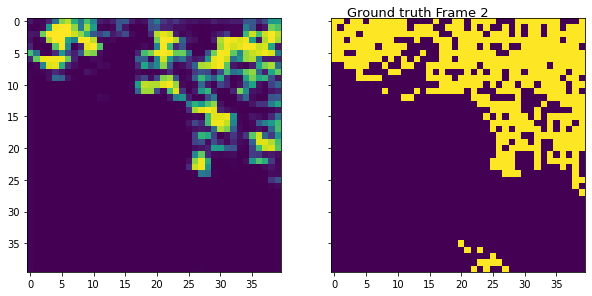

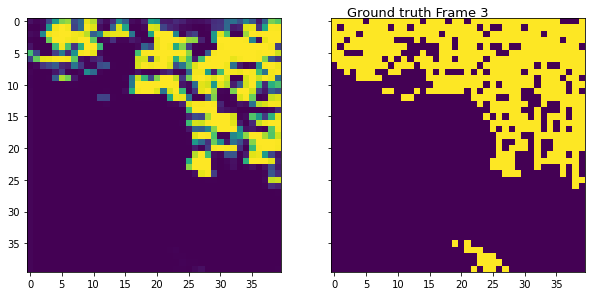

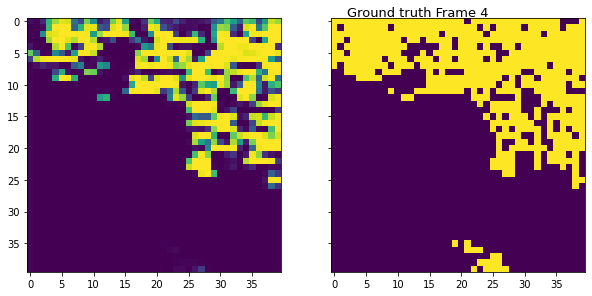

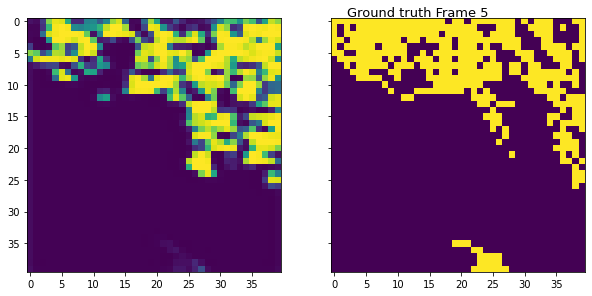

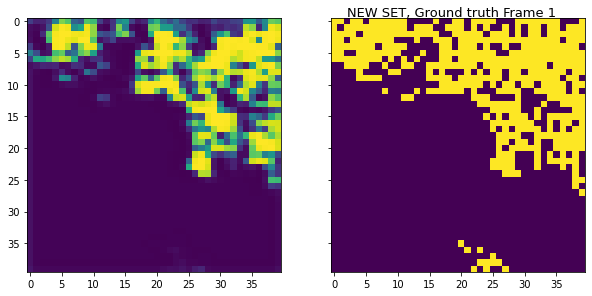

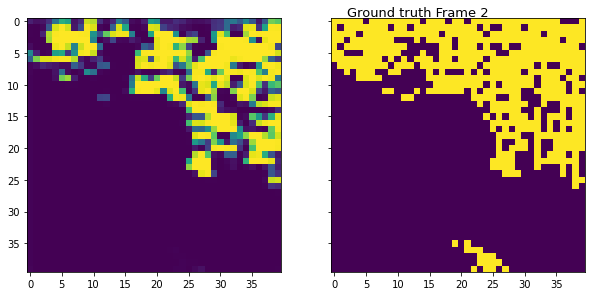

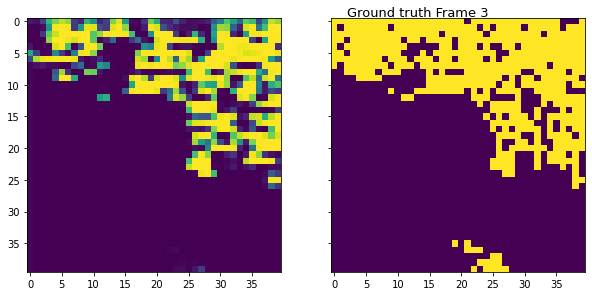

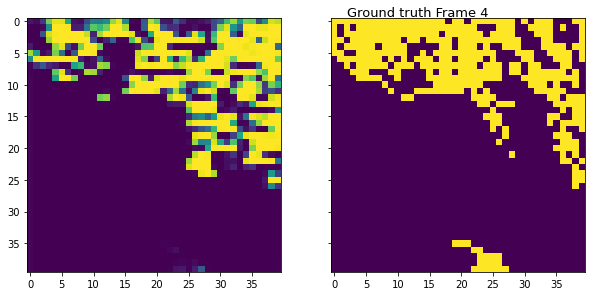

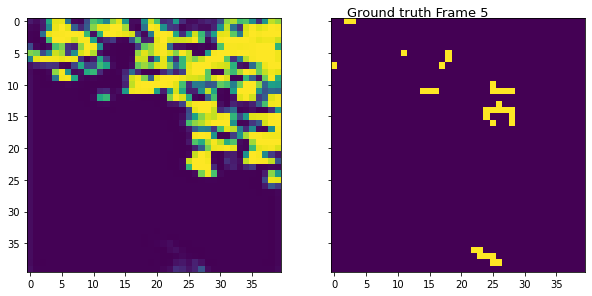

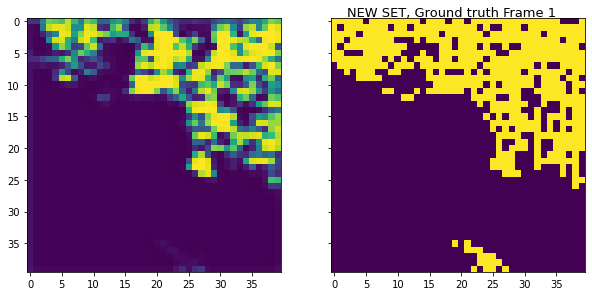

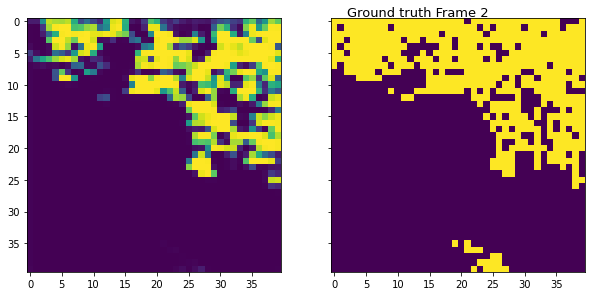

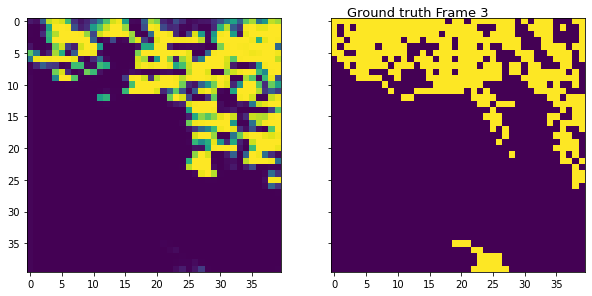

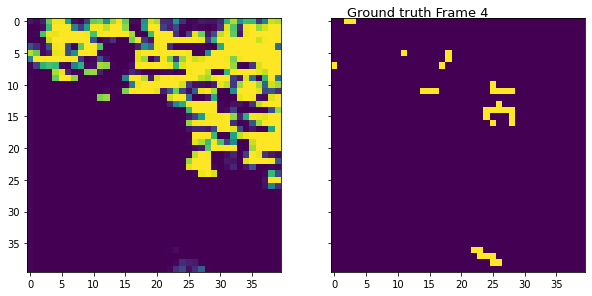

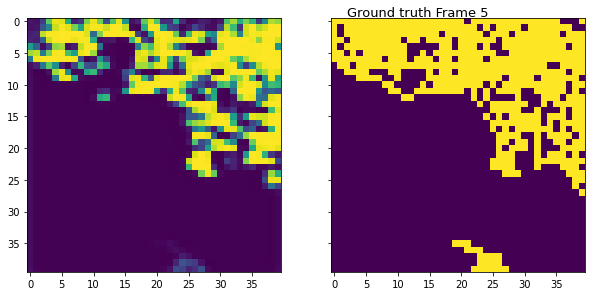

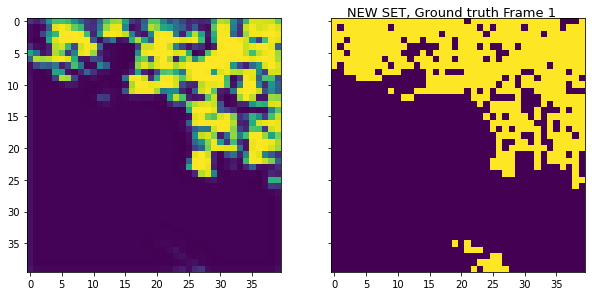

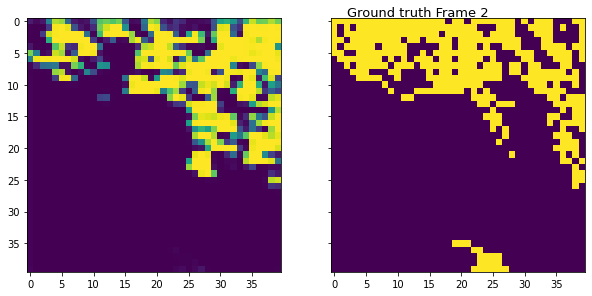

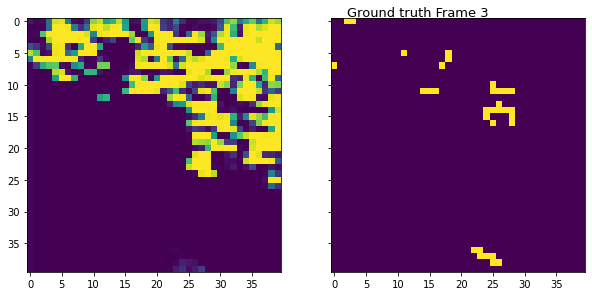

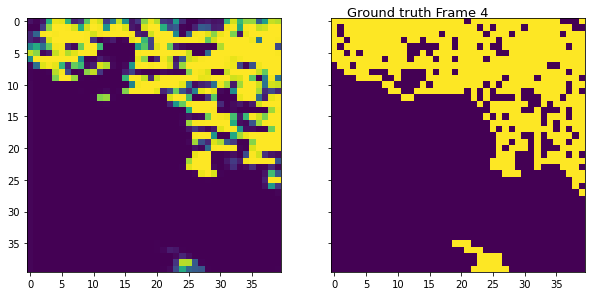

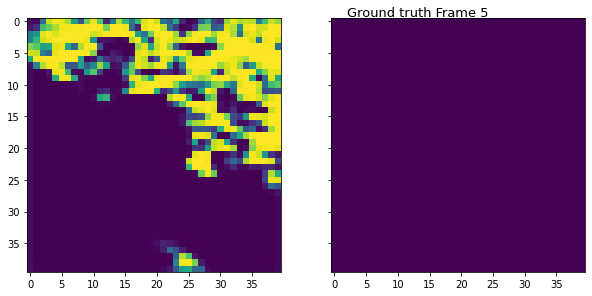

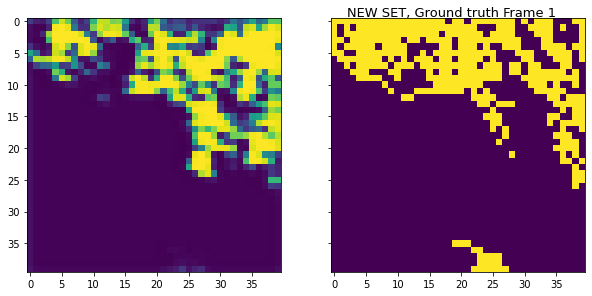

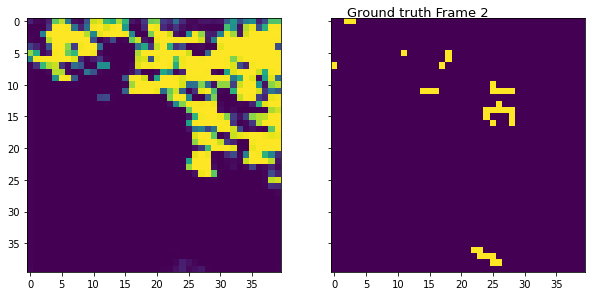

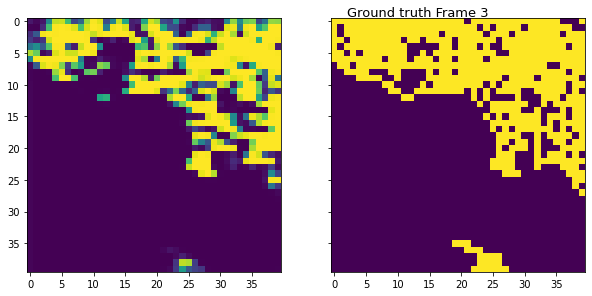

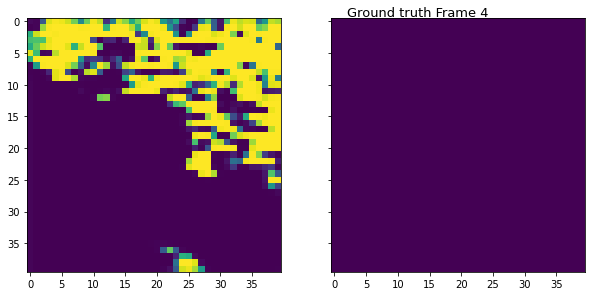

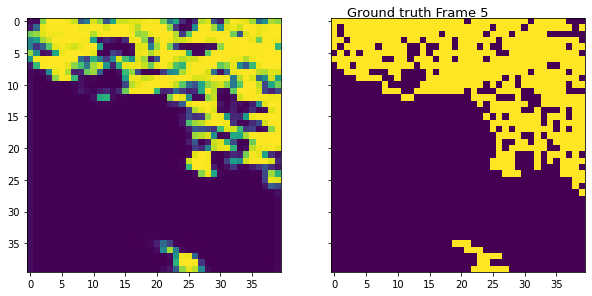

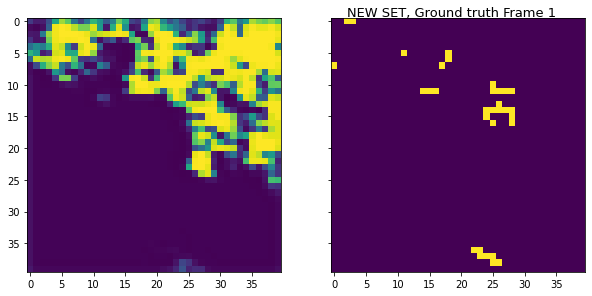

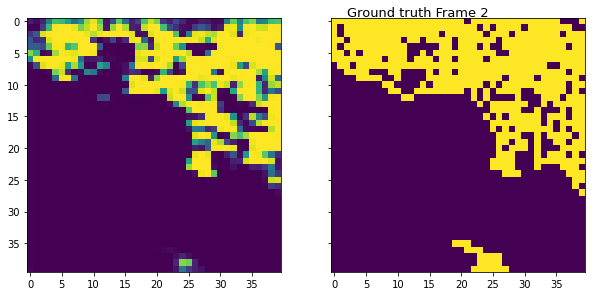

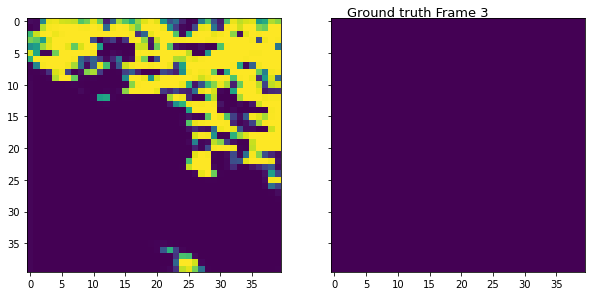

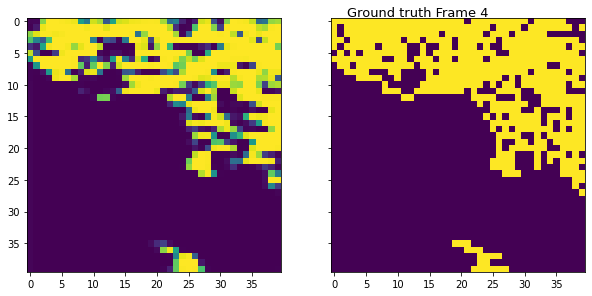

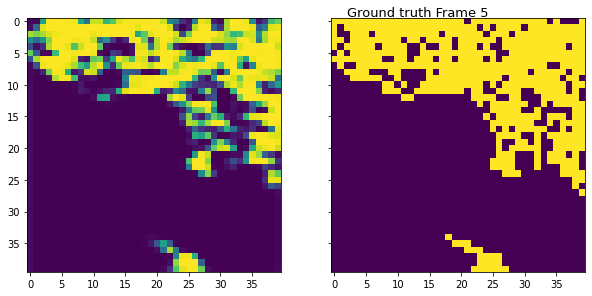

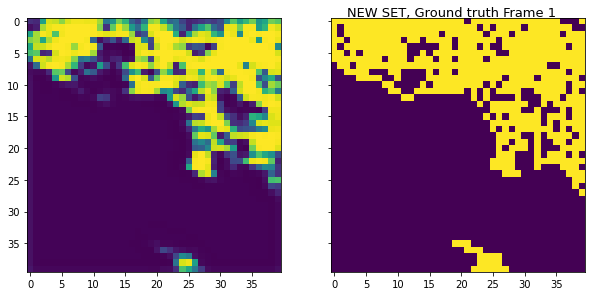

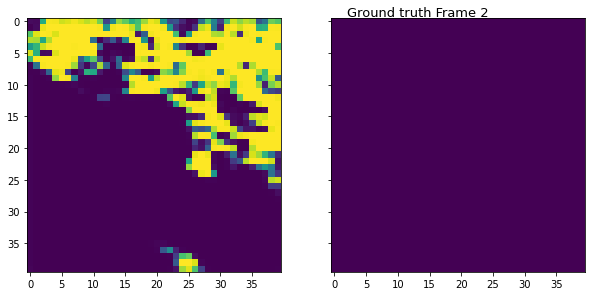

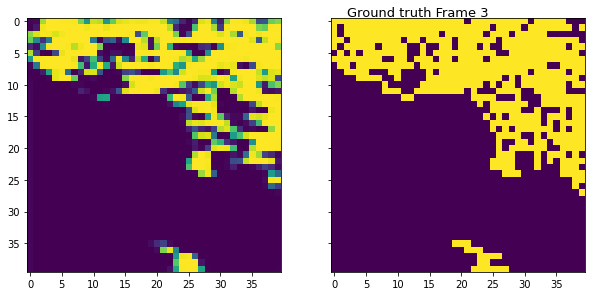

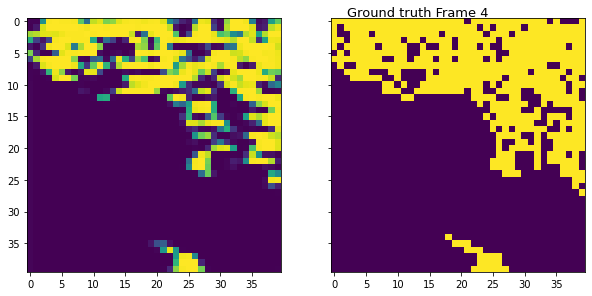

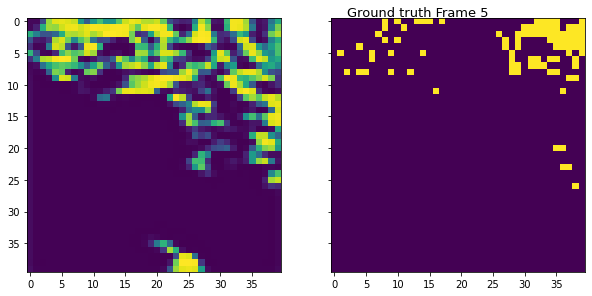

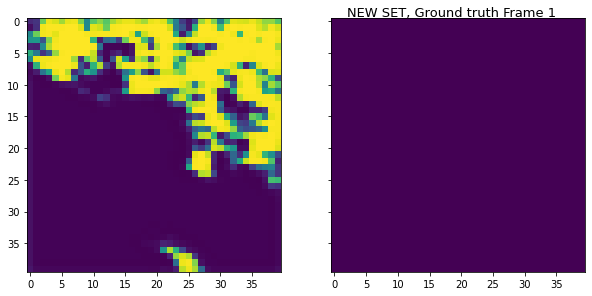

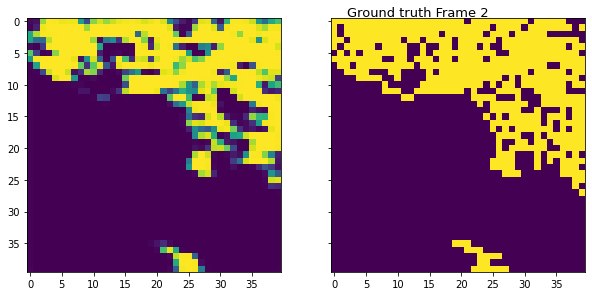

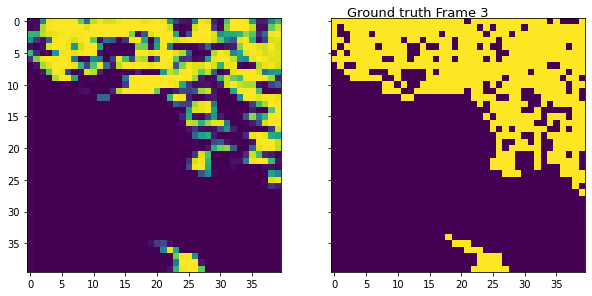

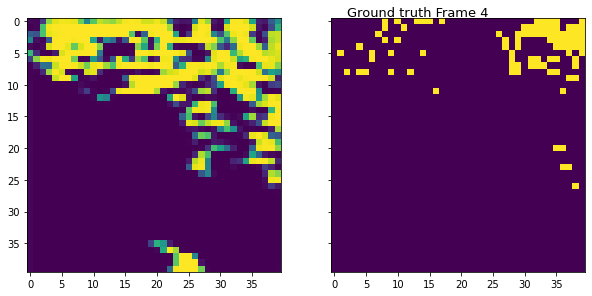

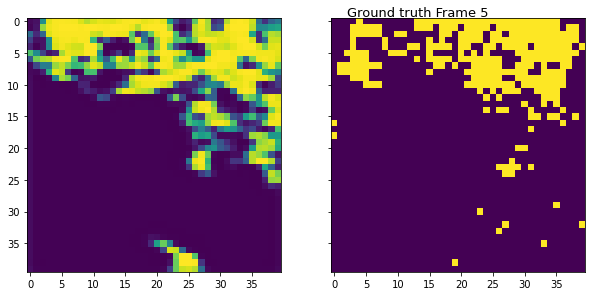

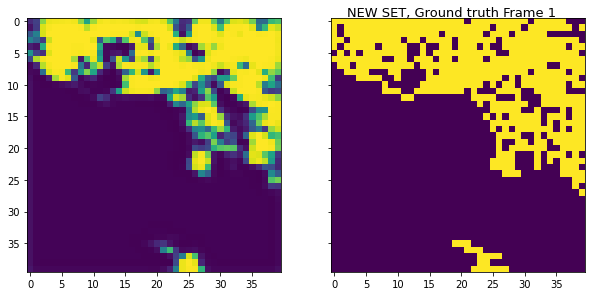

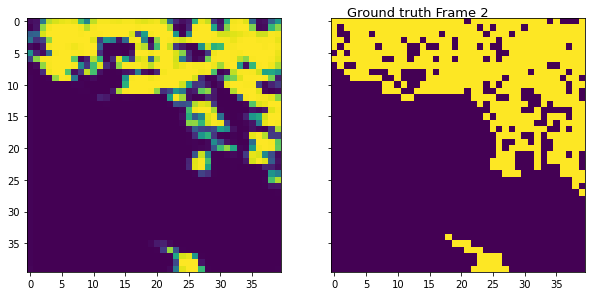

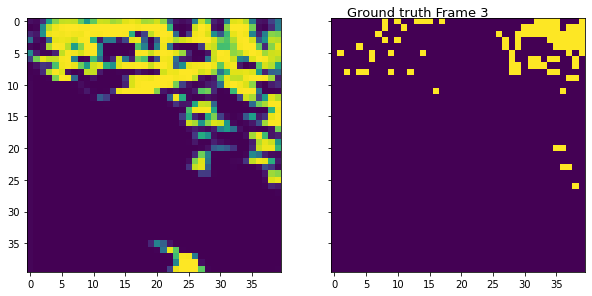

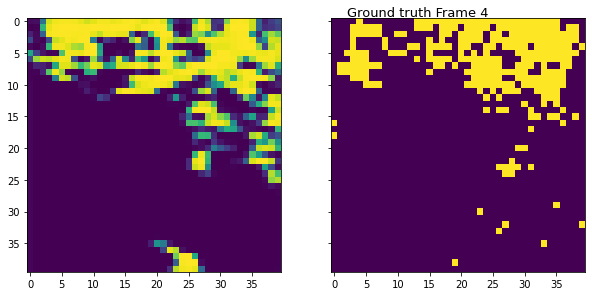

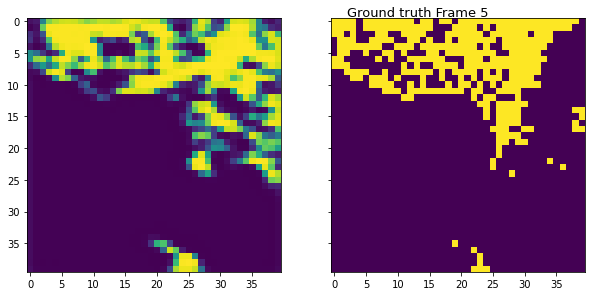

In [66]:
visulization(y_test, Y_hat, 10)

In [67]:
Y_hat[Y_hat > 0.5] = 1

In [68]:
Y_hat[Y_hat <= 0.5] = 0

## error analysis

In [69]:
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt
from skimage.metrics import mean_squared_error as mse
from skimage import data, img_as_float
def compare_single_frame(frameA, frameB):
    m = mse(frameA,frameB)
    s = ssim(frameA,frameB)
    fig, axs = plt.subplots(1,2, constrained_layout=True)
    axs[0].imshow(frameA,cmap="gray")
    axs[0].set_title("Predicted")
    axs[1].imshow(frameB, cmap="gray")
    axs[1].set_title(" MSE: %.2f, SSIM: %.2f"% (m,s))
    plt.show()
    

C:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\_shared\utils.py:348: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  return func(*args, **kwargs)


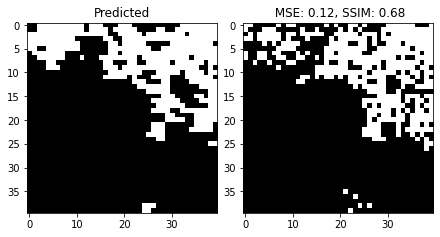

In [70]:
compare_single_frame(Y_hat[7,0,:,:,0],y_test[37,0,:,:,0])

In [71]:
Y_hat[5,0,:,:,:].mean()

0.221875

In [72]:
def compare_single_sample(sampleA, sampleB):
    fig, axs = plt.subplots(5,2,sharey=True, sharex=True, figsize=(20,20))
    fig.tight_layout()
    sample_m = 0
    sample_s = 0
    for frame in range(0,5):
        frameA = sampleA[frame]
        frameB = sampleB[frame]

        m = mse(frameA,frameB)
        s = ssim(frameA,frameB)
    
        sample_m = sample_m + m/5.0
        sample_s = sample_s + s/5.0
        axs[frame][0].imshow(frameA,cmap='gray')
        axs[frame][1].imshow(frameB, cmap="gray")
        axs[frame][0].set_title("Predicted Frame")
        axs[frame][1].set_title(" MSE: %.2f, SSIM: %.2f"% (m,s))
        
    fig.suptitle("Sample Difference (5 Frames) \n MSE: %.2f, SSIM: %.2f" % (sample_m,sample_s))
    plt.show()
    

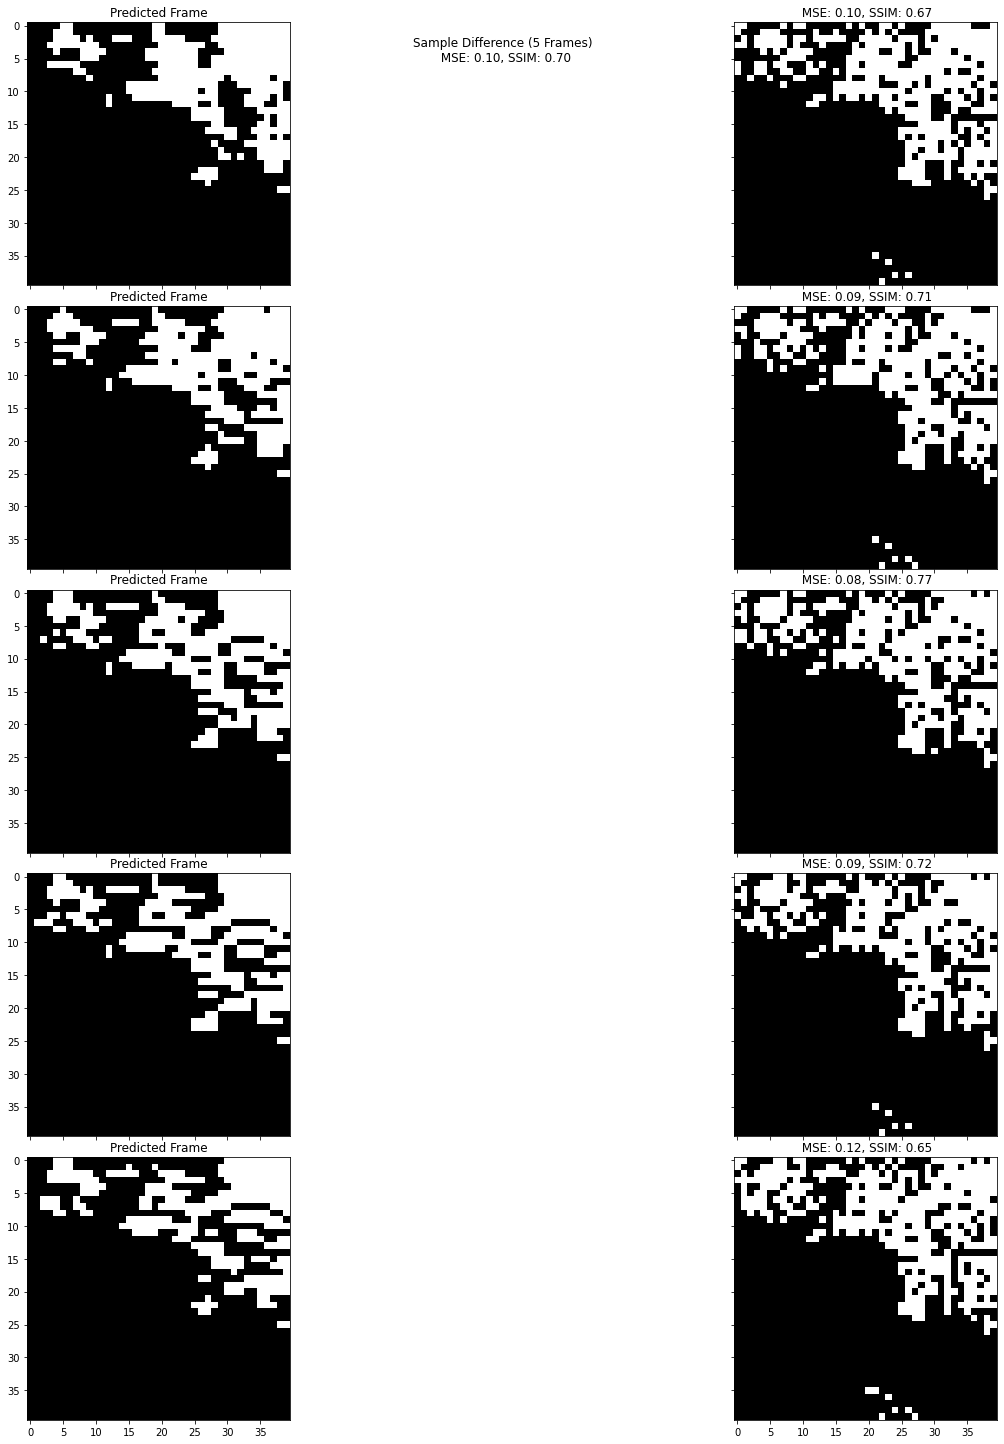

In [73]:
compare_single_sample(Y_hat[37,:,:,:,0],y_test[37,:,:,:,0])